## Titanic Dataset

This dataset contains information about the passengers on the Titanic, including whether they survived, their class, name, sex, age, number of siblings or spouses aboard, number of parents or children aboard, ticket number, fare, cabin number, and port of embarkation.

## Labels

- **PassengerId**: Unique identifier for each passenger.
- **Survived**: Survival status (0 = No, 1 = Yes).
- **Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
- **Name**: Name of the passenger.
- **Sex**: Gender of the passenger.
- **Age**: Age of the passenger.
- **SibSp**: Number of siblings or spouses aboard the Titanic.
- **Parch**: Number of parents or children aboard the Titanic.
- **Ticket**: Ticket number.
- **Fare**: Fare paid for the ticket.
- **Cabin**: Cabin number.
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# Task: Dataset Analysis

## Objective
Perform exploratory data analysis to understand the dataset, identify potential correlations, and visualize key findings.

## Requirements

- **NumPy**: Use for numerical operations and array manipulation.
- **Pandas**: Use for data manipulation and analysis.
- **Matplotlib**: Use for data visualization.


# 1. Data Loading and Exploration

- Load the dataset into a Pandas DataFrame.
- Explore the dataset's shape, data types, and descriptive statistics.
- Identify missing values (if any) and handle them appropriately.


In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'titanic_dataset.csv'

In [211]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (1309, 12)


In [213]:
print(f"Datatypes:\n{df.dtypes}")

Datatypes:
PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [214]:
df['Pclass'] = df['Pclass'].astype(float)
df['Fare'] = df['Fare'].astype(float)

ValueError: could not convert string to float: 'Peter, Master. Michael J'

In [ ]:
df.describe()

### To see null values and handle them

In [215]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,True,False,False,False,False,True,False
1305,False,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,True,False
1307,False,False,False,False,False,True,False,False,False,False,True,False


In [216]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               1
Age             262
SibSp             0
Parch             0
Ticket            0
Fare              2
Cabin          1013
Embarked          3
dtype: int64

- There are actually more records with unknown cabin information 
- Some of the records have no age information
- Very few unknown information about Embarked and Sex

### Before handing null values

- We need to find out mean and some data
- We can use numpy or pandas (describe)

In [217]:
numerical_features = df.select_dtypes(include=[np.number])   #Identifies all columns in the DataFrame df that contain numerical data (e.g., integers or floats).
num_idx = numerical_features.columns
mean_values = df[num_idx].mean()
median_values = df[num_idx].median()
std_values = df[num_idx].std()
quartiles = df[num_idx].quantile([0.25, 0.5, 0.75])

print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation:\n", std_values)
print("\nQuartiles:\n", quartiles)

#"Using pandas"
df.describe()

Mean Values:
 PassengerId    655.000000
Survived         0.377387
Age             29.853553
SibSp            0.498854
Parch            2.422460
Fare            33.303847
dtype: float64

Median Values:
 PassengerId    655.0000
Survived         0.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

Standard Deviation:
 PassengerId    378.020061
Survived         0.484918
Age             14.434225
SibSp            1.041658
Parch           73.736635
Fare            51.777595
dtype: float64

Quartiles:
       PassengerId  Survived   Age  SibSp  Parch     Fare
0.25        328.0       0.0  21.0    0.0    0.0   7.8958
0.50        655.0       0.0  28.0    0.0    0.0  14.4542
0.75        982.0       1.0  39.0    1.0    0.0  31.2750


,PassengerId,Survived,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1047.000000,1309.000000,1309.000000,1307.000000
mean,655.000000,0.377387,29.853553,0.498854,2.422460,33.303847
std,378.020061,0.484918,14.434225,1.041658,73.736635,51.777595
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,80.000000,8.000000,2668.000000,512.329200


## For handling Null values

1. I can use dropna or fillna (by mean or median or something relevant)
2. To find relevant info, I must use sklearn or others, to find info
3. For simplicity I must use some assumptions and find the data, (Note: Other more best approaches are available and I am not doing it right now)

### Evaluating columns

1. Age - I will have to find some relevant info and fill them, not drop them as they are only (20%) of total records
2. Sex - I will fill it manually as one record, by analysing the name of them (F or M)
3. Cabin - Drop them as they are more in number - most uncertain and there is not a possible way for me to predict them
4. Embarked - I will have to analyse them later

#### Sex column


In [218]:
df_wrong = df.loc[df['Sex'].isnull()]
df_wrong

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1308,1309,0,"Peter, Master. Michael J",male,NaN,1.0,1,2668,22.3583,NaN,C,NaN


- As we can see here, the Pclass is wrong. The data is made left by one cell and it's wrong.

In [219]:
idx = df_wrong.columns.get_loc('Pclass')  # index = 2
columns_to_shift = df_wrong.columns[2:]  # Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare','Cabin', 'Embarked'], dtype='object')
shifted_values = [None] * len(columns_to_shift)
pass_id = df_wrong.index[0]

#new values (Correct df)
for i in range(len(columns_to_shift) - 1):
    shifted_values[i + 1] = df_wrong.loc[pass_id, columns_to_shift[i]]

df_old = df.loc[df['PassengerId'] == 1309]

# Assign values using iloc
for i in range(idx, len(columns_to_shift) + idx):
    df_old.iloc[0, i] = shifted_values[i - idx]

df.iloc[-1] = df_old.iloc[0]

C:\Users\HARI\AppData\Local\Temp\ipykernel_2708\1560624339.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '22.3583' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_old.iloc[0, i] = shifted_values[i - idx]
C:\Users\HARI\AppData\Local\Temp\ipykernel_2708\1560624339.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '22.3583' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[-1] = df_old.iloc[0]


In [220]:
df['Pclass'] = df['Pclass'].astype(float)
df['Fare'] = df['Fare'].astype(float)

In [221]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3.0,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1.0,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3.0,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3.0,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,NaN,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [222]:
df_wrong = df.loc[df['Sex'].isnull()]
df_wrong

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


- Now Sex column is done.

#### Cabin column

In [223]:
df = df.drop('Cabin', axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3.0,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,1.0,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3.0,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3.0,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


### Embarked Column

- For now, we will assign them based on mode or mean
- We will find any insight and then we will change in a iterative manner

In [224]:
df['Embarked'].isnull().sum()

2

In [225]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1.0,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


- They both have purchased the same ticket, and it's suspicious data
- Need to analyse more on this one, for now drop them

In [226]:
df = df.dropna(subset=['Embarked'])
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


### Age column

- we will first see the distribution of data, and we will apply them based on mode or median or mean

In [227]:
df.loc[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3.0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2.0,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3.0,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3.0,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3.0,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,1,3.0,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
1301,1302,1,3.0,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
1304,1305,0,3.0,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1307,1308,0,3.0,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


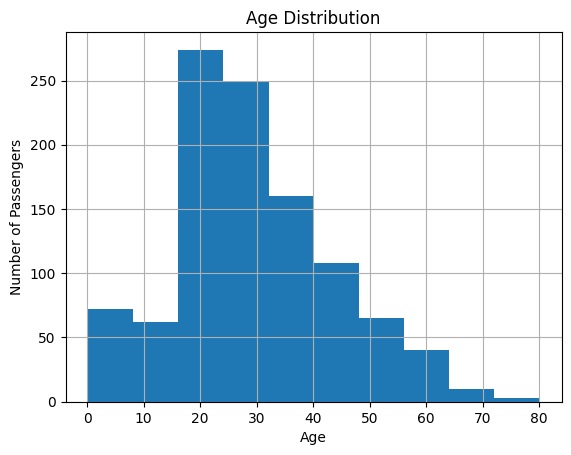

In [228]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

In [229]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1307.000000,1307.000000,1306.000000,1044.000000,1307.000000,1307.000000,1306.000000
mean,655.319816,0.376435,2.296325,29.842596,0.499617,0.385616,33.223956
std,377.922205,0.484677,0.837037,14.390739,1.042273,0.866092,51.765986
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


- We will use the mean and 50% percentile, we get around 29 age. we will set it like that for now

##### Later considerations for age to handle

**Consider the following:**

Distribution of the 'Age' column: Is it skewed or normal?
Impact of outliers: How sensitive is your analysis to outliers?
Relationship with other features: Are there any correlations that can be exploited?

**Additional Considerations:**

Feature Engineering: Create new features based on 'Age' (e.g., age groups) for potential analysis.
Outlier Detection: Identify and handle outliers in the 'Age' column if necessary.

In [230]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.loc[df['Age'].isnull()]

C:\Users\HARI\AppData\Local\Temp\ipykernel_2708\2008430306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\HARI\AppData\Local\Temp\ipykernel_2708\2008430306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].mean(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


# 2. Feature Analysis:

- Using NumPy, calculate the mean, median, standard deviation, and quartiles `for each numerical feature. (Done earlier)
- Create a correlation matrix using Pandas and visualize it using a heatmap in Matplotlib.
- Identify the top 5 features that are most correlated with the target variable.

## Correlation matrix and Heatmap

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.019327 -0.040948  0.025700 -0.055696  0.008576   
Survived       -0.019327  1.000000 -0.262114 -0.051645  0.003317  0.109949   
Pclass         -0.040948 -0.262114  1.000000 -0.364611  0.059531  0.016855   
Age             0.025700 -0.051645 -0.364611  1.000000 -0.190107 -0.130058   
SibSp          -0.055696  0.003317  0.059531 -0.190107  1.000000  0.373383   
Parch           0.008576  0.109949  0.016855 -0.130058  0.373383  1.000000   
Fare            0.032245  0.232286 -0.557886  0.170424  0.161030  0.222327   

                 Fare  
PassengerId  0.032245  
Survived     0.232286  
Pclass      -0.557886  
Age          0.170424  
SibSp        0.161030  
Parch        0.222327  
Fare         1.000000  
------------------------------------------------------------


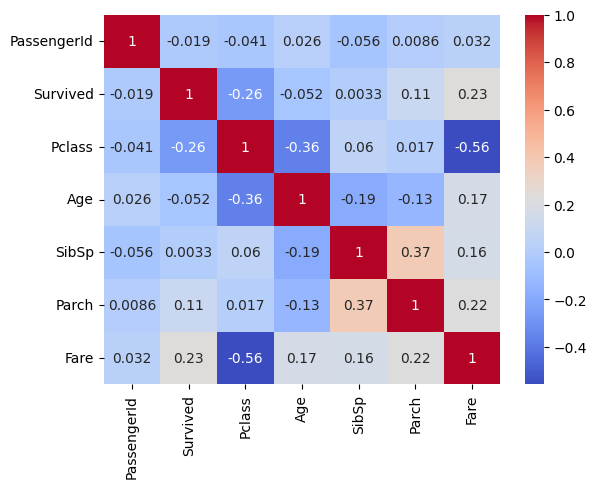

In [231]:
df_numeric = df.select_dtypes(include=np.number)

#Correlation matrix
corr_matrix = df_numeric.corr()
print(corr_matrix)
print ('-' * 60)

#Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show() 


#### What we observe:

- Survived has a weak negative correlation with Age. This suggests that older passengers were slightly less likely to survive.
- Survived has a positive correlation with Parch. This indicates that passengers with more parents or children were more likely to survive. This could be due to factors like family prioritization during evacuation.
- SibSp and Parch have a positive correlation. This suggests that passengers with more siblings/spouses tend to have more parents/children, implying larger family groups.
- Age has a negative correlation with SibSp and Parch. Older passengers tend to have fewer siblings/spouses and parents/children, which is logical.
- Passengers who paid higher fares had a better chance of survival
- Passengers in higher classes were more likely to survive.

In [232]:
df_numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3.0,22.000000,1,0,7.2500
1,2,1,1.0,38.000000,1,0,71.2833
2,3,1,3.0,26.000000,0,0,7.9250
3,4,1,1.0,35.000000,1,0,53.1000
4,5,0,3.0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,0,3.0,29.842596,0,0,8.0500
1305,1306,1,1.0,39.000000,0,0,108.9000
1306,1307,0,3.0,38.500000,0,0,7.2500
1307,1308,0,3.0,29.842596,0,0,8.0500


## 3. Data Visualization:
- Create histograms for at least 5 numerical features to understand their
distribution.
- Create box plots for the same 5 features to identify outliers.
- Visualize the relationship between the target variable and a few key features
using scatter plots or bar charts.

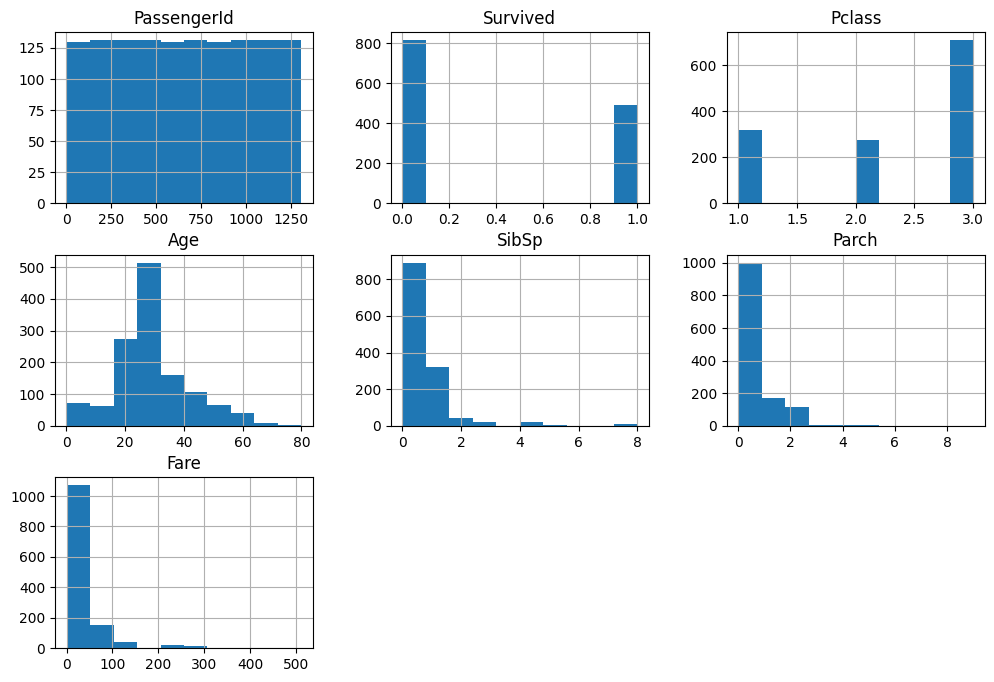

In [233]:
# Histograms
df_numeric.hist(figsize=(12, 8))
plt.show()

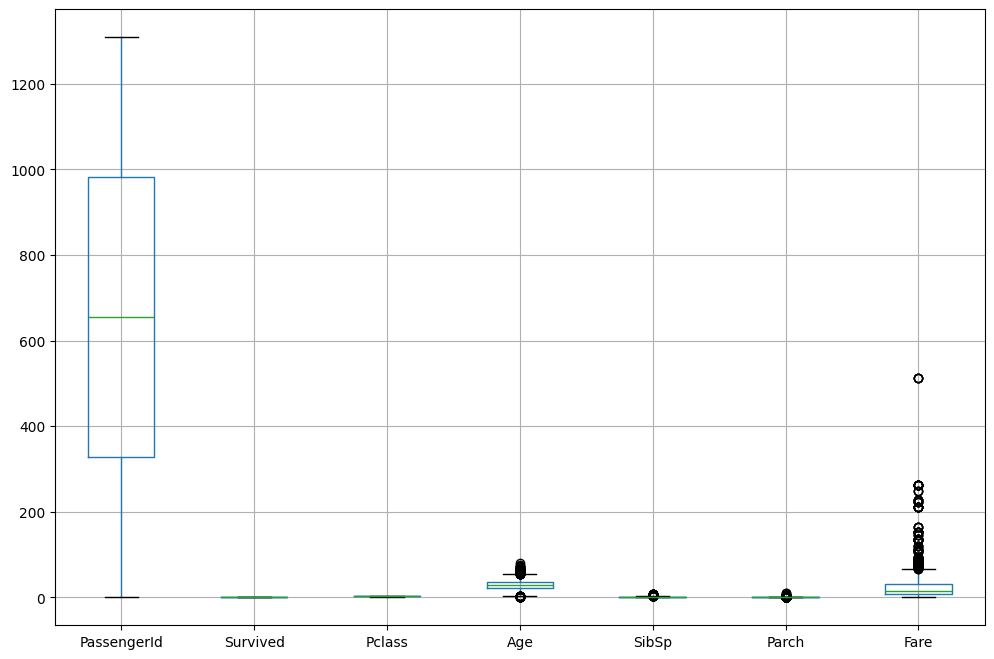

In [234]:
# Box plots
df_numeric.boxplot(figsize=(12, 8))
plt.show()

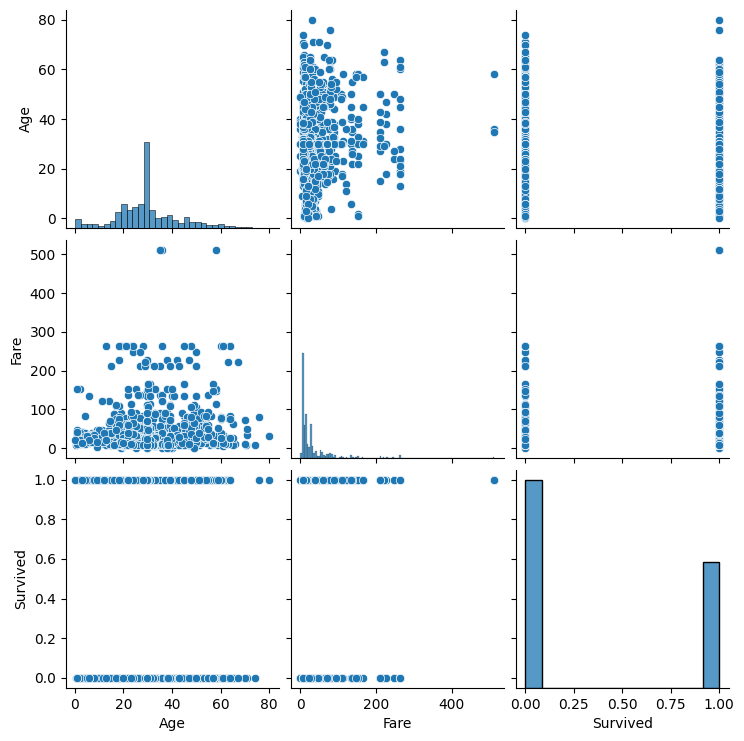

In [235]:
# Scatter plots
sns.pairplot(df[['Age', 'Fare', 'Survived']])
plt.show()

### 4. Feature Engineering:
- Create new features based on existing ones (e.g., combining features, creating
interaction terms).
- Explain the rationale behind creating these new features.

In [236]:
bins = [0, 25, 40, np.inf]
labels = ['Young', 'Adult', 'Senior']

df.loc[:, 'Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

C:\Users\HARI\AppData\Local\Temp\ipykernel_2708\542752685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [237]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df['FarePerPerson'] = df['Fare'] / df['FamilySize']
df['FarePerPerson'] = df['FarePerPerson'].fillna(df['Fare'])

C:\Users\HARI\AppData\Local\Temp\ipykernel_2708\1629087610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
C:\Users\HARI\AppData\Local\Temp\ipykernel_2708\1629087610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
C:\Users\HARI\AppData\Local\Temp\ipykernel_2708\1629087610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [238]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,FamilySize,IsAlone,FarePerPerson
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young,2,0,3.62500
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,2,0,35.64165
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,1,1,7.92500
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,2,0,26.55000
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,1,1,8.05000


In [239]:
def extract_title(name):
    try:
        return name.split(',')[1].split('.')[0].strip()
    except IndexError:
        return 'Unknown'

df['Title'] = df['Name'].apply(extract_title)


df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Mme', 'Capt', 'Countess', 'Lady', 'Sir'],
                                  'Rare')
df['Title'] = df['Title'].map({
    'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master', 'Rare': 'Rare', 'Unknown': 'Unknown'
})

C:\Users\HARI\AppData\Local\Temp\ipykernel_2708\618020386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Name'].apply(extract_title)
C:\Users\HARI\AppData\Local\Temp\ipykernel_2708\618020386.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Mme', 'Capt', 'Countess', 'Lady', 'Sir'],
C:\Users\HARI\AppData\Local\Temp\ipykernel_2708\618020386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [240]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,FamilySize,IsAlone,FarePerPerson,Title
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Young,2,0,3.625000,Mr
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Adult,2,0,35.641650,Mrs
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adult,1,1,7.925000,Miss
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adult,2,0,26.550000,Mrs
4,5,0,3.0,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adult,1,1,8.050000,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3.0,"Spector, Mr. Woolf",male,29.842596,0,0,A.5. 3236,8.0500,S,Adult,1,1,8.050000,Mr
1305,1306,1,1.0,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,Adult,1,1,108.900000,NaN
1306,1307,0,3.0,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Adult,1,1,7.250000,Mr
1307,1308,0,3.0,"Ware, Mr. Frederick",male,29.842596,0,0,359309,8.0500,S,Adult,1,1,8.050000,Mr


### Rationale for choosing feature engineering (These new cols):

- Family size might influence survival chances. Larger families might have different evacuation priorities or challenges compared to individuals or small families.
- Traveling alone might affect survival chances due to factors like lack of assistance or different evacuation priorities
- Age can be a significant factor in survival, and grouping ages into bins can help capture age-related patterns
- It might be relevant for understanding spending habits and potential survival chances
- Titles can provide information about social status, gender, and potentially survival chances. Grouping rare titles can help handle infrequent categories.


C:\Users\HARI\AppData\Local\Temp\ipykernel_2708\795637629.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col).size().plot(kind='bar', ax=ax, label=col, alpha=0.7)


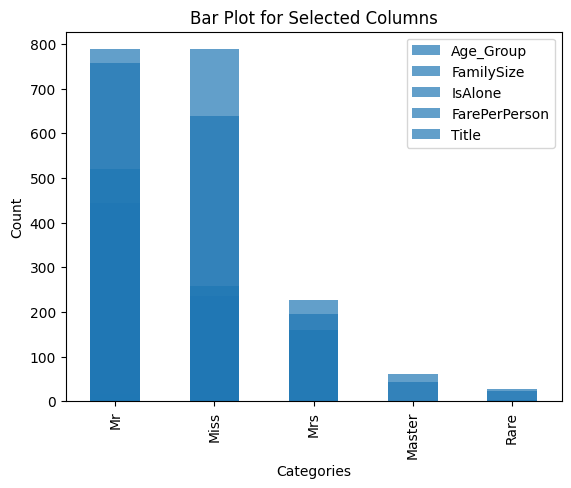

In [241]:
new_cols = ['Age_Group', 'FamilySize', 'IsAlone', 'FarePerPerson', 'Title']

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each column separately
for col in new_cols:
    if df[col].dtype == 'object':  # For categorical data
        df[col].value_counts().plot(kind='bar', ax=ax, label=col, alpha=0.7)
    else:  # For numerical data
        df.groupby(col).size().plot(kind='bar', ax=ax, label=col, alpha=0.7)

# Add labels and legend
ax.set_ylabel('Count')
ax.set_xlabel('Categories')
ax.set_title('Bar Plot for Selected Columns')
ax.legend()

# Show the plot
plt.show()


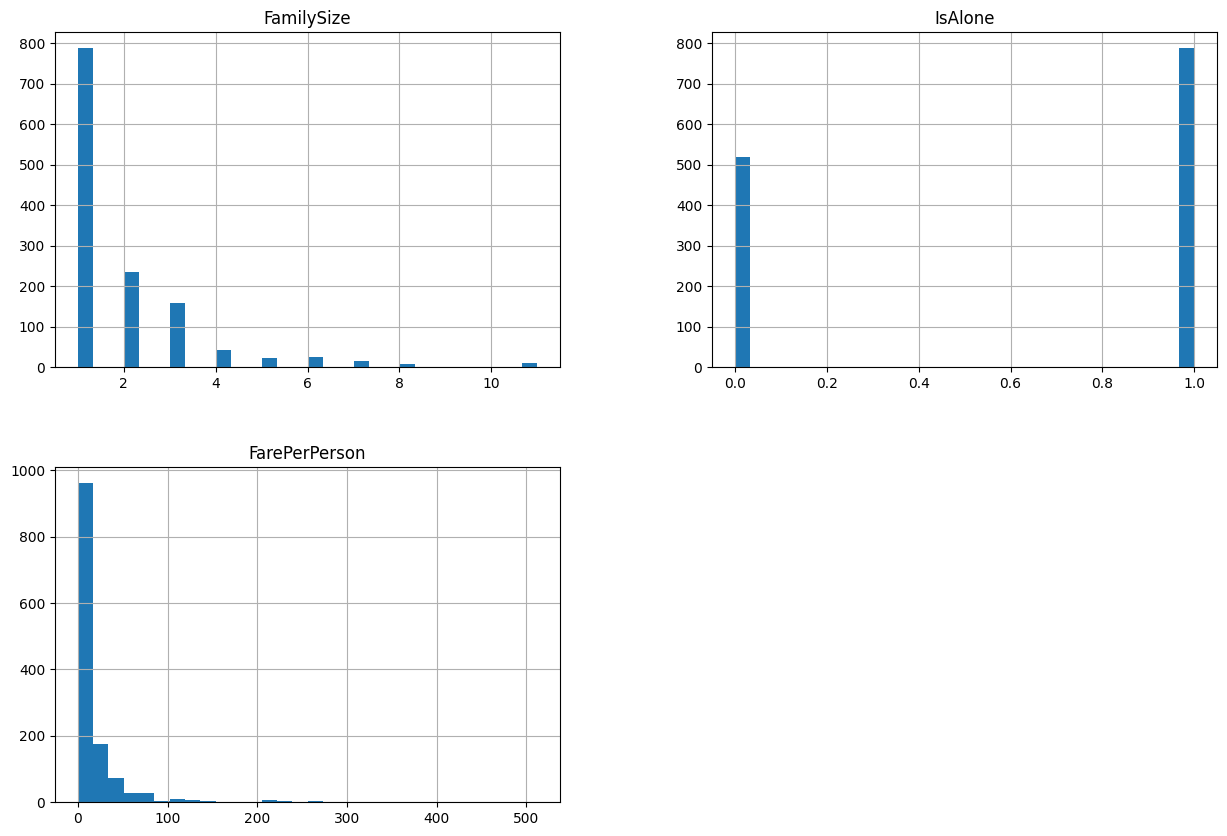

In [242]:
df[new_cols].hist(bins=30, figsize=(15, 10))
plt.show()

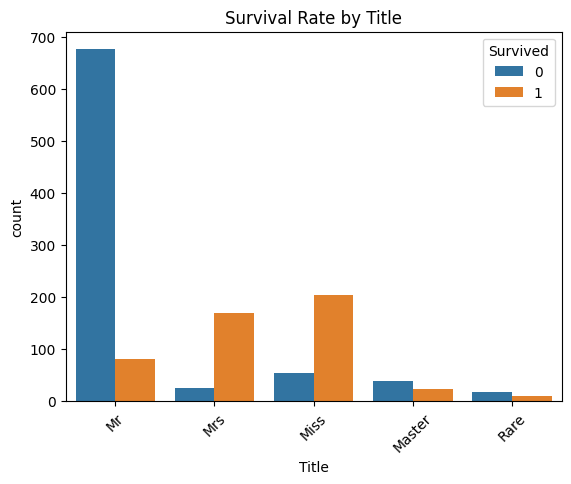

In [243]:
sns.countplot(x='Title', hue='Survived', data=df)
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)
plt.show()

- Certain titles, such as 'Mrs' and 'Miss', were associated with higher survival rates compared to 'Mr'.

## 5. Insights and Conclusions:

- Summarize the key findings from your analysis.
- Discuss potential implications of your findings for the analysis.
- Identify potential areas for further investigation or improvement.


#### Some Implications and Improvements:
- Identify limitations and potential biases in the data
- Are there other relevant features that could be included in the analysis?
- Explore more sophisticated machine learning models to improve predictive accuracy. Investigate feature importance to identify the most influential factors
- Explore interactions between variables to uncover hidden patterns.
- Outliers have to be taken care of, but they were in the fare and age ones (as we needed only Pclass to find their class, and the fare). But ages have to be taken care of, might be a error in data collection.

#### All insights and some conclusions based on the data are given in the path traced till now, But once Again I will paste them here. Finally:

- Certain titles, such as 'Mrs' and 'Miss', were associated with higher survival rates compared to 'Mr'.
- Survived has a weak negative correlation with Age. This suggests that older passengers were slightly less likely to survive.
- Survived has a positive correlation with Parch. This indicates that passengers with more parents or children were more likely to survive. This could be due to factors like family prioritization during evacuation.
- SibSp and Parch have a positive correlation. This suggests that passengers with more siblings/spouses tend to have more parents/children, implying larger family groups.
- Age has a negative correlation with SibSp and Parch. Older passengers tend to have fewer siblings/spouses and parents/children, which is logical.
- Passengers who paid higher fares had a better chance of survival
- Passengers in higher classes were more likely to survive.